In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
 
df = pd.read_csv('Mall_clustered.csv')

In [2]:
df.head()

,Unnamed: 0,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,2
1,1,21,15,81,3
2,2,20,16,6,2
3,3,23,16,77,3
4,4,31,17,40,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Label                   200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,0
196,45,126,28,4
197,32,126,74,0
198,32,137,18,4


## Visualizing the relationship between sepal and target classes

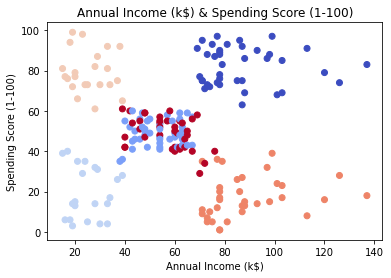

In [5]:
def visuvalize_data():
   # pisahkan atribut dan label
    predictions = ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']

    X = df[predictions]
    y = df['Label']
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Annual Income (k$) & Spending Score (1-100)')
    plt.show()
 
visuvalize_data()

In [6]:
# pisahkan atribut dan label
predictions = ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']

X = df[predictions]
y = df['Label']

from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

In [7]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# proses cross validasi untuk mencari parameter terbaik
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1], 'degree': [3, 6, 9],
            'kernel':['rbf','poly', 'linear']}
            
svc=svm.SVC(probability=True)
print("Proses pelatihan model...")
model=GridSearchCV(svc,param_grid)
model.fit(X_train,y_train)
print('Selesai...')
model.best_params_

Proses pelatihan model...
Selesai...


{'C': 10, 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [17]:
# inisiasi model dengan best params
model = svm.SVC(C = 10, degree = 3, gamma = 0.0001, kernel='rbf', probability = True)
model.fit(X_train,y_train)

SVC(C=10, gamma=0.0001, probability=True)

In [22]:
# hasil prediksi data validasi
y_pred = model.predict(X_test)
print(f'Prediksi label : {y_pred}')
print(f'Ground Truth   : {np.array(y_test)}')
print(f'Akurasi model  : {accuracy_score(y_pred,y_test)*100}%')

Prediksi label : [5 3 2 4 4 5 5 4 4 5 1 4 0 5 4 0 1 4 1 5 5 2 4 1 5 1 5 1 0 5 3 2 1 5 4 1 0
 0 4 1]
Ground Truth   : [5 3 2 4 4 5 5 4 4 3 1 4 0 5 4 0 1 4 1 5 5 2 4 5 5 1 5 1 0 5 3 2 1 5 4 1 0
 0 4 1]
Akurasi model  : 95.0%


In [19]:
age=eval(input("Enter Age- "))
annual_income=eval(input("Enter Annual Income (k$)- "))
spending_score=eval(input("Spending Score (1-100)- "))
X_new = np.array([[age,annual_income,spending_score]])

Enter Age- 10
Enter Annual Income (k$)- 179
Spending Score (1-100)- 26


In [20]:
#calling predict method from knn for making prediction
prediction = model.predict(X_new)
print("Predicted target name",[prediction])

Predicted target name [array([4], dtype=int64)]


In [21]:
y_pred = model.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))

Test set prediction:
 [5 3 2 4 4 5 5 4 4 5 1 4 0 5 4 0 1 4 1 5 5 2 4 1 5 1 5 1 0 5 3 2 1 5 4 1 0
 0 4 1]
